#### Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Subhaan khokhar\\Downloads\\EDA Internship Week 6\\births.csv")

def calculate_decade(year):
    return (year // 10) * 10 

df['Decade'] = calculate_decade(df['year'])

print(df)


       year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15542  2008     10  NaN      M  183219    2000
15543  2008     11  NaN      F  158939    2000
15544  2008     11  NaN      M  165468    2000
15545  2008     12  NaN      F  173215    2000
15546  2008     12  NaN      M  181235    2000

[15547 rows x 6 columns]


#### Show the descriptive statistics of the data.

In [2]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


#### Check if your data contains any missing values.

In [3]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

#### What is the trend of male & female births every decade?

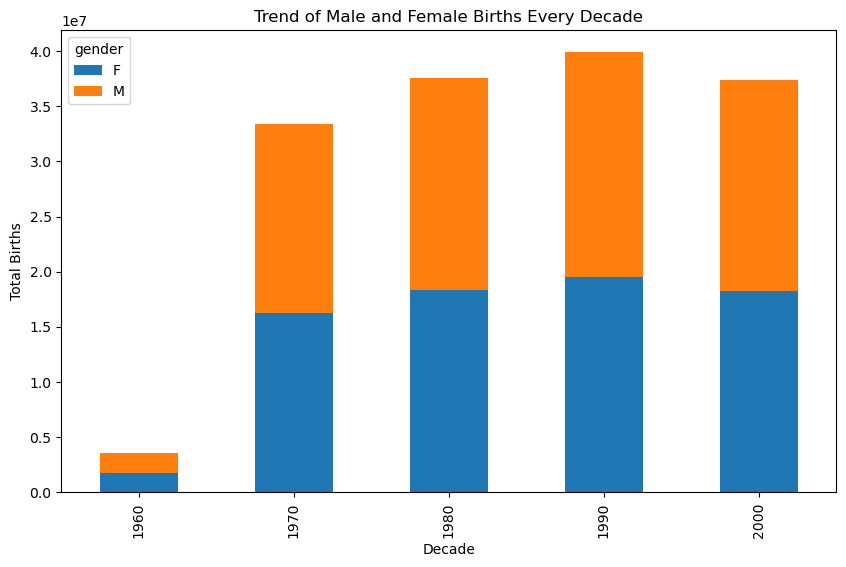

In [4]:
births_by_decade_gender = df.groupby(['Decade', 'gender'])['births'].sum().unstack()

births_by_decade_gender.plot(kind='bar', stacked=True, figsize=(10, 6), xlabel='Decade', ylabel='Total Births',
                             title='Trend of Male and Female Births Every Decade')
plt.show()

#### To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the centralnmtendency of the data while excluding extreme values.

In [5]:
mean_births = df['births'].mean()
std_births = df['births'].std()

lower_limit = mean_births - 5 * std_births
upper_limit = mean_births + 5 * std_births

filtered_df = df[(df['births'] >= lower_limit) & (df['births'] <= upper_limit)]

print(filtered_df.head())

   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


#### Group the data by month and day separately.

In [6]:

births_by_month = df.groupby('month')['births'].sum()

births_by_day = df.groupby('day')['births'].sum()

print("Births by Month:")
print(births_by_month)

print("\nBirths by Day:")
print(births_by_day)

Births by Month:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64

Births by Day:
day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189278
30.0    2141788
31.0    1342126
99.0       6403
Name: births, dtype: int64


#### Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

In [ ]:

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['day_of_year'] = df['date'].dt.dayofyear

average_births_by_day_of_year = df.groupby('day_of_year')['births'].mean()

plt.figure(figsize=(10, 6))
average_births_by_day_of_year.plot(xlabel='Day of the Year', ylabel='Average Number of Births',
                                   title='Average Births by Day of the Year', legend=False)

plt.show()